## kNN

#### Pros: High accuracy, insensitive to outliers, no assumptions about data
#### Cons: Comptutionally expensive, requires a lot of memory

In [11]:
from numpy import *
from os import listdir
import operator
def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

[ 1.  1.  0.  0.]
['A', 'A', 'B', 'B']


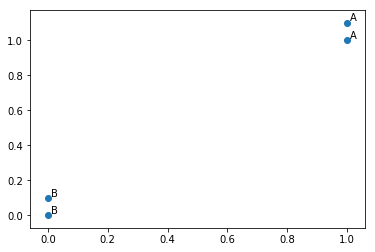

In [12]:
import matplotlib.pyplot as plt
group, labels = createDataSet()
print(group[:, 0])
print(labels)

plt.scatter(group[:, 0], group[:, 1])
for i in range(len(group[:, 0])):
    plt.annotate(labels[i], xy = (group[i, 0], group[i, 1]), xytext = (group[i, 0] + 0.01, group[i, 1] + 0.01))
plt.show()

In [13]:
#This is a KNN classifier
def classify0(inX, dataSet, labels, k):
    #number of training samples
    dataSetSize = dataSet.shape[0]
    #construct testing data with training samples
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    #calculate the Euclidian distance
    sqDifMat = diffMat**2
    sqDistances = sqDifMat.sum(axis = 1)
    distances = sqDistances**0.5
    #get index of the distance in distances from min to max
    sortedDistIndicies = distances.argsort()
    #dic for vote labels
    classCount = {}
    #voting with lowest k distances by sorting dictionary
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

In [14]:
a = classify0([0, 0], group, labels, 3)
print(a)

B


In [15]:
a = group.sum(axis=1)
a = group.shape
print(a)

(4, 2)


#### Exercise1: using kNN on results from a dating site

In [16]:
#function: Text record to Numpy parsing code
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0 : 3]
        classLabelVector.append(int(listFromLine[-1]))
        index = index + 1
    return returnMat, classLabelVector

In [17]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
print(shape(datingDataMat), shape(datingLabels))
print(datingDataMat.min(0))
print(datingDataMat.shape[0])

(1000, 3) (1000,)
[ 0.        0.        0.001156]
1000


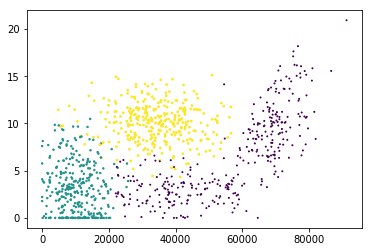

In [18]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 1.0*array(datingLabels), 1.0*array(datingLabels))
plt.show()

In [19]:
#function: Data-normalizing code(0 to 1)
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet/tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [20]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [21]:
#function: Classifier testing for dating site
def datingClassTest():
    hoRatio = 0.20
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    norMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(norMat[i, :], normMat[numTestVecs:m, :],\
                                     datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %d, the real answer is: %d" \
             %(classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is : %f" % (errorCount/float(numTestVecs)))

In [22]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [23]:
#real time testing
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input(\
                                  'percentage of time spent playing computer games'))
    ffMiles = float(input('frequent flier miles'))
    iceCream = float(input('liters of ice cream'))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    norMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges, \
                                 norMat, datingLabels, 3)
    print("you will probably like this person:",resultList[classifierResult - 1])


In [24]:
classifyPerson()

percentage of time spent playing computer games10
frequent flier miles1000
liters of ice cream0.5
you will probably like this person: in small doses


#### Exercise2: a handwriting recognition

In [25]:
# change the data from 32*32 to 1*1024
def img2vector(filename):
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        linestr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i + j] = int(linestr[j])
    return returnVect

In [26]:
testVector = img2vector('digits/trainingDigits/0_0.txt')
testVector.shape

(1, 1024)

In [29]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('digits/trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('digits/trainingDigits/%s' % fileNameStr)
    testFileList = listdir('digits/testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('digits/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("The classifier came back with: %d, the real answer is: %d" \
             % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of error is : %d" % errorCount)
    print("\nthe total error rate is : %f" % (errorCount/float(mTest)))

In [30]:
handwritingClassTest()

The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answe

The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answe

The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answe

The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answe

The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answe

The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answe

The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answe